# Abstract and Introduction 

Since 2013, officers in the United States have killed more than 1000 individuals per year. The Constitution regulates these contacts. The reasonable police officer's judgments on whether risks to their own or others' safety warrant the use of lethal force are considered. These encounters/shootings prompted widespread reflection, resulting in the birth of the Black Lives Matter movement and a presidential task group on policing.

Some white individuals in the United States continue to have racist ideas that they are prepared to reveal with pollsters, such as not wanting a close relative to marry a black person or being generally "cool" with black people. Additionally, police officers occasionally kill civilians. Between 2005 and mid-2019, over 100 law enforcement officers were charged with murder or manslaughter in connection with on-duty shootings, and 35 were convicted, despite the fact that the vast majority of shootings during that time period lacked body-camera footage demonstrating what occurred in each case. In other instances, a civil settlement with the city or municipality where the officer was slain occurred, but no criminal charges were filed against the officer. Given these data, the possibility that some police shootings are motivated by racial bias cannot be ruled out.


Questions about whether Black citizens make up more than their share of FOIS and if White police discriminate against them are at the center of this discussion. Although racially biased police use of excessive force, particularly police shootings, has been a concern for a long time, it has lately received more attention as a result of widespread media coverage of numerous high-profile incidents.


In this project, we will research racial disparities and determine the kind of persons who are most frequently encountered by US police. We will also develop a machine learning method to predict the ethnicity of an encounter victim. Along with that, we'll look into other aspects of encounters, such as where the majority of encounters occur and a variety of other factors.

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Changing default pandas setting to custom
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

## Loading Data

In [2]:
df = pd.read_csv("fatal-police-shootings-data.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
df.shape

(5416, 14)

## Data Cleaning

In [4]:
# Splitting date into year, month, day
def split_date(x):
    x = pd.to_datetime(x)
    year = x.year
    month = x.month
    day = x.day
    return list([year, month, day])

# Applying function and storing data
df[["year", "month", "day"]] = list(df.date.apply(split_date))

Here I made a function that will take single date and will split it into year, month and day and will return them to main function. Then I applied function on date feature and stored all values in separate columns

In [5]:
# Dropping Primary Key, name and date
df.drop(["id", "date", "name"], axis=1, inplace=True)

In [6]:
# Checking Duplicates
df[df.duplicated()]

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
1722,shot,undetermined,18.0,M,B,Newark,NJ,False,undetermined,Not fleeing,False,2016,9,30
4845,shot,gun,41.0,M,B,Miramar,FL,False,attack,Car,False,2019,12,5


In [7]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
race,6,521,9.619645,object
flee,4,249,4.597489,object
age,77,235,4.338996,float64
armed,93,227,4.191285,object
gender,2,2,0.036928,object


In the above function I recieved the data frame and iterated it column by column and checked different values like missing values, percentage and data type. Then I apllied it on the datafrmae and results are in front of that we have missing values in 5 features.

In [8]:
# Cleaning and fillling NAN values
df.dropna(subset=["armed"], inplace=True)
df.race.fillna("Not Mentioned", inplace=True)
df.age.fillna(df.age.median(), inplace=True)
df.dropna(inplace=True)

In [9]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,


In the above cell, first of all I dropped the NAN from armed feature and then fill NAN in race feature with "Not Mentioned". After that I fill NAN in age with the median of age feature and dropped the NAN from all remaning features. Again I rechecked the NAN and no feature were having NAN values now.

## Data Visualization

Through data visualization we will check whether race biasness is present in USA police or not.

In [10]:
# Percentage on bar
def per_on_bar(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [11]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

Total unique values are:  7 


Category	Value

W                2285
B                1185
H                 808
Not Mentioned     469
A                  85
N                  70
O                  44
Name: race, dtype: int64


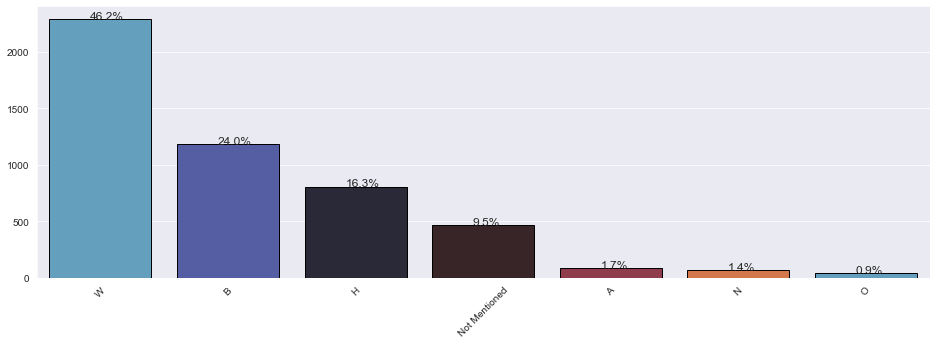

In [12]:
per_on_bar(df.race)

From this graph we can see that most of the encountered peoples were white but that does not this is the ratio. We know in USA most of the people are white so we have to check the ratio with respect to population of both.

In [13]:
# Taking out number of encounters for white and black
white = df.race.value_counts()["W"]
black = df.race.value_counts()["B"]

In [14]:
# Calculating ratio by their population
white_ratio = (white/248)
black_ratio = (black/44)

# Printing details
print(f"Ratio of white being killed out of 100 is {white_ratio}")
print(f"Ratio of black being killed out of 100 is {black_ratio}")

Ratio of white being killed out of 100 is 9.213709677419354
Ratio of black being killed out of 100 is 26.931818181818183


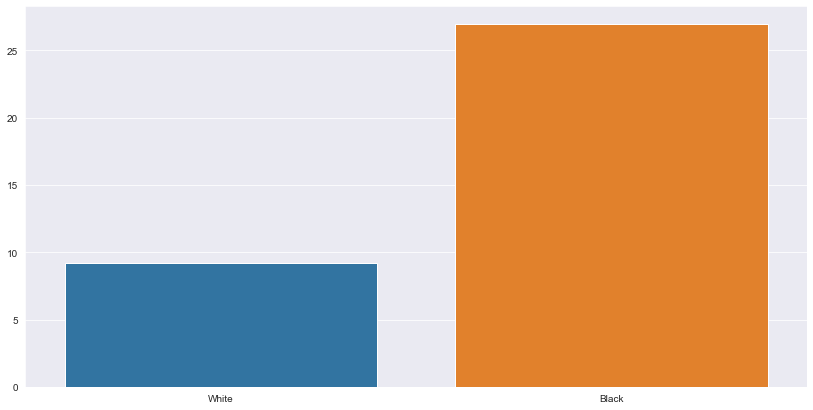

In [15]:
sns.barplot(x=["White","Black"], y=[white_ratio, black_ratio])
plt.show()

From this graph we can see that the ratio of encuonters of black and white people with respect to their total population in USA is high for black people. Here I took the population in millions like 248 means 248 millions.

So, yes race biasness is present in USA Police.

Total unique values are:  6 


Category	Value

2015    929
2019    927
2018    915
2016    883
2017    857
2020    435
Name: year, dtype: int64


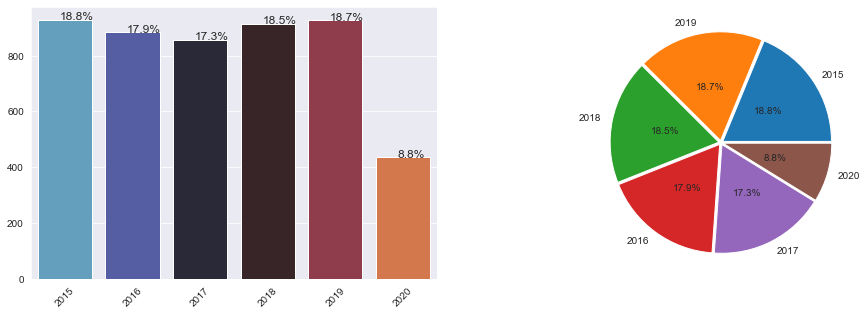

In [16]:
make_plots(df.year)

Almost all of the year has eqaul number of encounters except for 2020 becuase we have data for only halh of the year.

Total unique values are:  2312 


Category	Value

Los Angeles         73
Phoenix             72
Houston             53
Las Vegas           42
San Antonio         39
Columbus            35
Jacksonville        32
Albuquerque         32
Chicago             31
Kansas City         30
St. Louis           29
Denver              29
Austin              27
Tucson              26
Oklahoma City       26
Miami               25
New York            25
Tulsa               22
Bakersfield         21
San Jose            20
Atlanta             20
Louisville          20
Mesa                20
Baltimore           19
Long Beach          18
Orlando             18
Indianapolis        17
Fresno              17
Springfield         16
Dallas              16
Colorado Springs    16
Charlotte           16
Memphis             15
Aurora              15
Portland            15
Washington          15
Philadelphia        15
Pueblo              15
San Diego           14
San Francisco       14
Name: city, dtype: int64


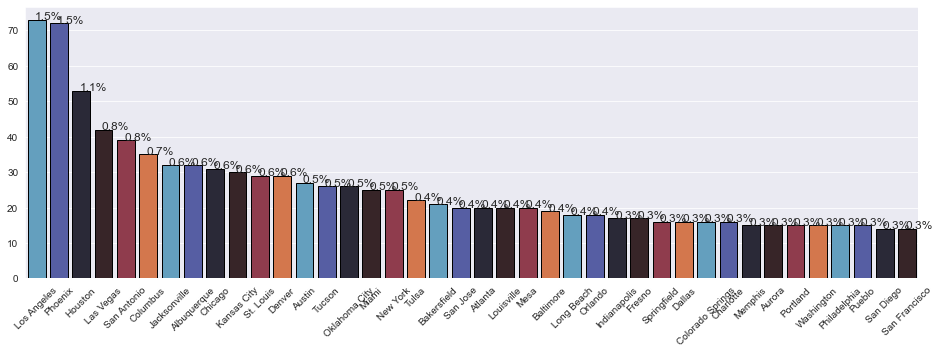

In [17]:
per_on_bar(df.city, limited=True, n=40)

From this graph we can see that most of encounter were done in Los Angeles and in Phoenix.

Total unique values are:  2 


Category	Value

M    4733
F     213
Name: gender, dtype: int64


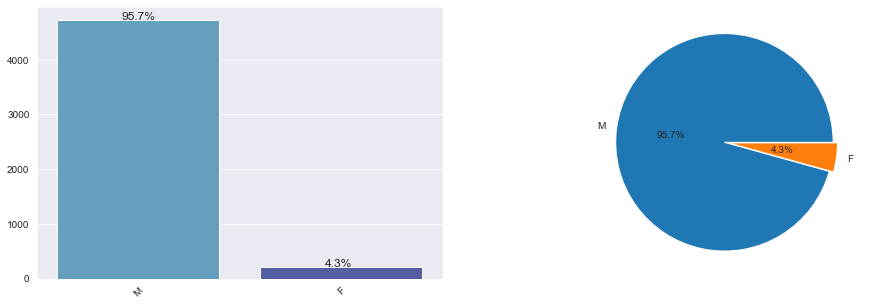

In [18]:
make_plots(df.gender)

97% victims were male in fatal police shotings

## Model Building

Here we will build a machine learning classifier to check what is the race of victim depending upon other features.

In [19]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in df.select_dtypes("O"):
    df[i] = encoder.fit_transform(df[i])

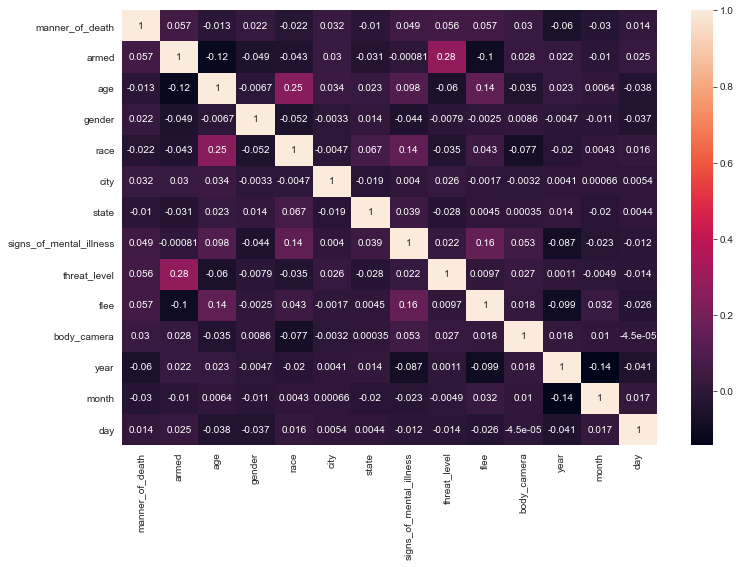

In [20]:
# Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In the above cell I calculated and displayed the correlation of features.

In [21]:
# Splitting data into train test part 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("race", axis=1), df.race)

In [22]:
# Building and training model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Making predictions
y_pred = model.predict(X_test)

# Conclusions

The goal of this study was to ascertain if the United States Police are prejudiced against minorities when they come into contact with them. This assertion is backed up by a dataset. Thus, I began by importing the data into a notebook and then cleaning it to eliminate duplicate and null items. I also eliminated features from my data that were no longer required and made three new features from the date column in the process.

Then I examined the numbers and concluded that, indeed, the police in the United States are biased, and that the ratio of interactions with black individuals is far greater than the ratio with white folks. Additionally, I performed additional research and learned that the bulk of the victims were from Los Angeles and Phoenix and were between the ages of 25 and 35. The percentage of interactions is roughly constant throughout all years.

Then, using a number of parameters such as age, mental illness, and so on, I developed a machine learning model capable of identifying the race of a victim.